# Calling necessary libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.stats import skew
from scipy.stats import kurtosis

# Loading Data

In [11]:
fuel_data = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")

# Data Summary

In [12]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [149]:
fuel_data['fuel_qty_burned'].describe()

count    2.952300e+04
mean     2.622119e+06
std      9.118004e+06
min      1.000000e+00
25%      1.381700e+04
50%      2.533220e+05
75%      1.424034e+06
max      5.558942e+08
Name: fuel_qty_burned, dtype: float64

In [151]:
kurtosis(fuel_data['fuel_qty_burned'].dropna())

651.2589365474387

In [13]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [15]:
fuel_data.shape

(29523, 11)

In [22]:
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [18]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [17]:
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1998_12_195_2_13,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


# Data Validation

In [35]:
fuel_data['fuel_unit'].describe()

count     29523
unique        9
top         mcf
freq      11534
Name: fuel_unit, dtype: object

In [20]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [27]:
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

In [28]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [37]:
duplicateRowsDF = fuel_data[fuel_data.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [record_id, utility_id_ferc1, report_year, plant_name_ferc1, fuel_type_code_pudl, fuel_unit, fuel_qty_burned, fuel_mmbtu_per_unit, fuel_cost_per_unit_burned, fuel_cost_per_unit_delivered, fuel_cost_per_mmbtu]
Index: []


In [48]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [44]:
fuel_data.groupby("fuel_unit")['fuel_unit'].count()

True

In [54]:
fuel_data.head(-1)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29517,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.068,13.69,14.31,0.890
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990


In [55]:
fuel_data['fuel_cost_per_unit_burned'].describe()

count     29523.000000
mean        208.649031
std        2854.490090
min        -276.080000
25%           5.207000
50%          26.000000
75%          47.113000
max      139358.000000
Name: fuel_cost_per_unit_burned, dtype: float64

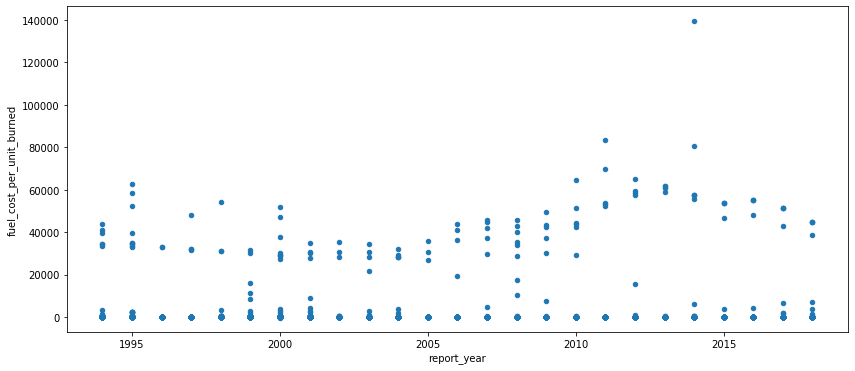

In [77]:
fuel_data.plot(kind='scatter', x='report_year', y='fuel_cost_per_unit_burned', figsize=(14,6))

In [57]:
fuel_data['fuel_cost_per_unit_burned'].median()

26.0

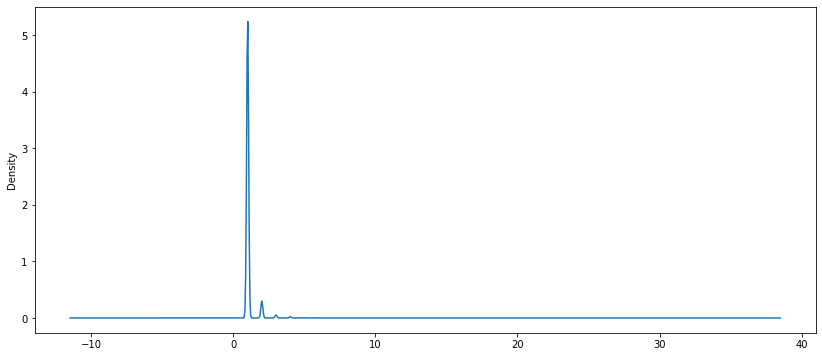

In [72]:
burned_per_year.plot(kind='density', figsize=(14,6))

In [102]:
fuel_qty_burned_per_year = fuel_data.groupby('report_year').agg({'total_cost_mmbtu':'sum'})
print(fuel_qty_burned_per_year)

             total_cost_mmbtu
report_year                  
1994             2.790082e+10
1995             4.557686e+10
1996             2.592094e+10
1997             3.418039e+10
1998             3.602268e+10
1999             3.057764e+10
2000             3.400959e+10
2001             3.394898e+10
2002             3.021712e+10
2003             3.113286e+10
2004             3.051147e+10
2005             3.647241e+10
2006             3.833030e+10
2007             4.165022e+10
2008             4.578170e+10
2009             3.775314e+10
2010             4.146838e+10
2011             3.985143e+10
2012             3.683566e+10
2013             3.980151e+10
2014             4.825197e+10
2015             3.229251e+10
2016             3.120221e+10
2017             2.681922e+10
2018             2.914455e+10


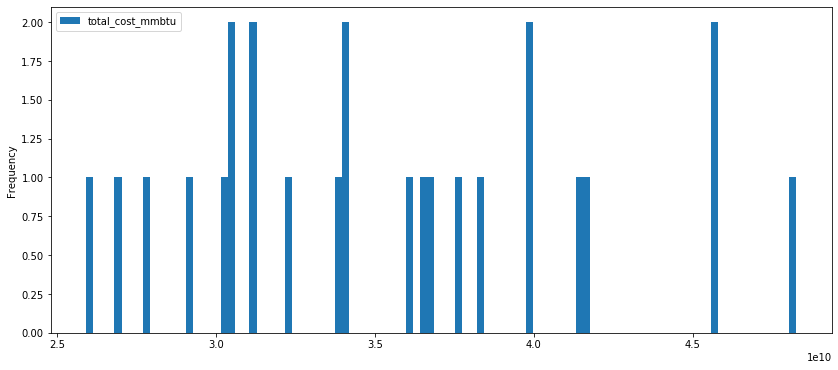

In [108]:
fuel_qty_burned_per_year.plot(kind='hist', bins=100,  figsize=(14, 6))

In [109]:
fuel_qty_burned_per_year.describe()

,total_cost_mmbtu
count,2.500000e+01
mean,3.542618e+10
std,6.100493e+09
min,2.592094e+10
25%,3.057764e+10
50%,3.418039e+10
75%,3.980151e+10
max,4.825197e+10


In [122]:
fuel_data.head(-1)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_mmbtu_burned,total_cost_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,8.921254e+07,1.000073e+08
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.739994e+08,1.948793e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,7.187562e+07,1.185948e+08
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,8.956064e+07,1.764345e+08
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,4.053300e+04,1.041698e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29517,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.068,13.69,14.31,0.890,6.582047e+06,5.858022e+06
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030,1.990814e+04,1.797705e+05
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950,8.470665e+05,5.887112e+06
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990,1.108272e+05,9.963369e+05


In [127]:
fuel_data.loc[fuel_data['plant_name_ferc1'] == 'lange ct facility']

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_mmbtu_burned,total_cost_mmbtu
17098,f1_fuel_2008_12_12_1_12,12,2008,lange ct facility,gas,mcf,273927.0,0.966,0.00,0.00,7.04,264613.482,1.862879e+06
18207,f1_fuel_2009_12_12_1_12,12,2009,lange ct facility,gas,mcf,166442.0,0.957,5.65,5.65,6.09,159284.994,9.700456e+05
20020,f1_fuel_2010_12_12_1_12,12,2010,lange ct facility,gas,mcf,62762.0,0.974,7.44,7.44,7.64,61130.188,4.670346e+05
21204,f1_fuel_2011_12_12_1_12,12,2011,lange ct facility,gas,mcf,53104.0,0.975,7.79,7.79,7.64,51776.400,3.955717e+05
25449,f1_fuel_2014_12_12_1_12,12,2014,lange ct facility,gas,mcf,40738.0,1.022,8.57,8.57,8.39,41634.236,3.493112e+05
26542,f1_fuel_2015_12_12_1_3,12,2015,lange ct facility,gas,mcf,128965.0,1.062,6.57,6.57,6.19,136960.830,8.477875e+05
28568,f1_fuel_2017_12_12_1_3,12,2017,lange ct facility,gas,mcf,99998.0,1.049,3.63,3.63,3.46,104897.902,3.629467e+05
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99,110827.240,9.963369e+05


In [129]:
gas_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'gas']

In [134]:
gas_average['fuel_cost_per_unit_burned'].describe()

count    11486.000000
mean        13.659397
std        163.286631
min          0.000000
25%          3.230000
50%          4.650000
75%          6.960000
max      10490.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [135]:
waste_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'waste']

In [137]:
waste_average['fuel_cost_per_unit_burned'].describe()

count    441.000000
mean      19.518122
std       29.988017
min     -276.080000
25%       10.335000
50%       21.933000
75%       32.650000
max      132.291000
Name: fuel_cost_per_unit_burned, dtype: float64

In [138]:
oil_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'oil']

In [139]:
oil_average['fuel_cost_per_unit_burned'].describe()

count      8064.000000
mean        168.877086
std        2406.101479
min           0.000000
25%          37.610000
50%          68.945500
75%          98.689250
max      139358.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [140]:
coal_average =fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'coal']

In [141]:
coal_average['fuel_cost_per_unit_burned'].describe()

count     8547.000000
mean        67.421830
std        943.771433
min          0.000000
25%         23.958500
50%         33.318000
75%         44.668000
max      44033.320000
Name: fuel_cost_per_unit_burned, dtype: float64

In [98]:
fuel_data['total_mmbtu_burned'] = fuel_data['fuel_qty_burned'] * fuel_data['fuel_mmbtu_per_unit']

In [100]:
fuel_data['total_cost_mmbtu'] = fuel_data['fuel_cost_per_mmbtu'] * fuel_data['total_mmbtu_burned']